<a href="https://colab.research.google.com/github/HarshaV05/rand.stuff.imp/blob/master/06_1_Loading_the_competition_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# How to load the competition dataset
1. download the training data set from Canvas
2. put it in the same folder as your notebook
3. execute the code below
4. The training data will be stored in the variable `X_train`, the targets in `y_train`.

In [11]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
import sklearn.model_selection as ms
import sklearn.neural_network as nn

In [0]:
def load_competition_training_data():
    train_df = pd.read_json('drive/My Drive/AppliedDS/train_data.json')
    y = train_df['targets']
    train_df.drop('targets', axis=1, inplace=True)
    X = train_df.values
    return X,y

X_train, y_train = load_competition_training_data()

In [3]:
X_train.shape

(627, 184)

In [0]:
# svm.SVC?

In [0]:
# Cs = [0.001, 0.003, 0.01, 0.03, 0.1, 0.3, 1, 3 , 10, 25, 50, 100, 250, 1000]
# Kernels = ['rbf', 'sigmoid', 'linear']
# Gammas = [1e-2, 1e-3, 1e-4, 1e-5]

# parameters = {'C':Cs, 'kernel': Kernels, 'gamma': Gammas}
# svc = svm.SVC()

# clf = ms.GridSearchCV(estimator=svc,param_grid=parameters)
# clf.fit(X_train,y_train)

In [0]:
from sklearn.decomposition import PCA
pca = PCA(n_components=28)
X_train_pca = pca.fit_transform(X_train)

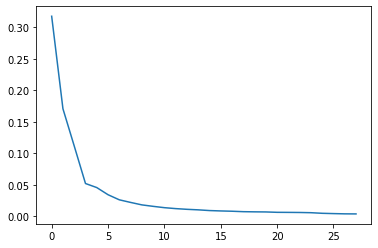

In [7]:
plt.plot(pca.explained_variance_ratio_)

In [8]:
var = pca.explained_variance_ratio_
np.sum(var[0:28])

0.9534981427618182

In [9]:
Cs = [0.001, 0.003, 0.01, 0.03, 0.1, 0.3, 1, 3 ]
Kernels = ['rbf', 'sigmoid', 'linear']
Gammas = [1e-2, 1e-3, 1e-4]

parameters = {'C':Cs, 'kernel': Kernels, 'gamma': Gammas}
svc = svm.SVC()

clf = ms.GridSearchCV(estimator=svc,param_grid=parameters)
clf.fit(X_train_pca,y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.001, 0.003, 0.01, 0.03, 0.1, 0.3, 1, 3],
                         'gamma': [0.01, 0.001, 0.0001],
                         'kernel': ['rbf', 'sigmoid', 'linear']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [10]:
clf.best_params_

{'C': 1, 'gamma': 0.01, 'kernel': 'rbf'}

In [0]:
best_svm = svm.SVC(C = 1, gamma=0.01, kernel='rbf')

In [0]:
def load_competition_testing_data():
    train_df = pd.read_json('drive/My Drive/AppliedDS/test_data.json')
    y = train_df['targets']
    train_df.drop('targets', axis=1, inplace=True)
    X = train_df.values
    return X,y


X_test, y_test = load_competition_testing_data()

In [0]:
pca = PCA(n_components = 28)
pca.fit(X_train)
X_test_pca = pca.transform(X_test)

In [28]:
best_svm.fit(X=X_train, y=y_train)
y_pred_svm = best_svm.predict(X_test)
acc = 100*(1-np.sum(np.abs(y_test - y_pred_svm))/len(y_test))
print("accuracy is {:.4f}%".format(acc))

accuracy is 78.9474%


In [0]:
# Hidden_layer_sizes = [(100,), (20,10)]
# Activations = ['identity', 'logistic', 'tanh', 'relu']
# #Solvers = ['lbfgs', 'sgd','adam']
# learning_rate = ['constant', 'adaptive']

# parameters = {'hidden_layer_sizes': Hidden_layer_sizes, 'activation': Activations}
# mlp = nn.MLPClassifier(max_iter = 2000)

# clf = ms.GridSearchCV(estimator=mlp,param_grid=parameters)
# clf.fit(X_train,y_train)

In [15]:
parameter_space = {
    'hidden_layer_sizes': [(50,50,50), (50,100,50), (100,)],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.05],
    'learning_rate': ['constant','adaptive'],
}

mlp = nn.MLPClassifier(max_iter = 1000)

clf = ms.GridSearchCV(estimator=mlp,param_grid=parameter_space)
clf.fit(X_train_pca,y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarni

GridSearchCV(cv=None, error_score=nan,
             estimator=MLPClassifier(activation='relu', alpha=0.0001,
                                     batch_size='auto', beta_1=0.9,
                                     beta_2=0.999, early_stopping=False,
                                     epsilon=1e-08, hidden_layer_sizes=(100,),
                                     learning_rate='constant',
                                     learning_rate_init=0.001, max_fun=15000,
                                     max_iter=1000, momentum=0.9,
                                     n_iter_no_change=10,
                                     nesterovs_momentum=True, power_t=0.5,
                                     random_s...
                                     solver='adam', tol=0.0001,
                                     validation_fraction=0.1, verbose=False,
                                     warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'activation': ['

In [16]:
clf.best_params_

{'activation': 'relu',
 'alpha': 0.0001,
 'hidden_layer_sizes': (100,),
 'learning_rate': 'adaptive',
 'solver': 'sgd'}

In [0]:
best_mlp = nn.MLPClassifier(activation='relu', hidden_layer_sizes = (100,), alpha= 0.0001, solver = 'sgd', learning_rate= 'adaptive', max_iter = 2000)

In [27]:
# MLP 
best_mlp.fit(X=X_train, y=y_train)
y_pred_mlp = best_mlp.predict(X_test)
acc = 100*(1-np.sum(np.abs(y_test - y_pred_mlp))/len(y_test))
print("accuracy is {:.4f}%".format(acc))

accuracy is 78.9474%


In [0]:
# CVal = []
# Accuracy = []
# c = 0.0001
# for i in range(1,20):
#   c = c*3
#   svc = svm.SVC(kernel='linear', C= c) 
#   scores =  ms.cross_val_score(svc, X_train, y_train, cv=5)
#   #print("Accuracy: %0.4f (+/- %0.4f)" % (scores.mean(), scores.std() * 2))
#   Accuracy.append(scores.mean())
#   CVal.append(c)

# plt.plot(CVal,Accuracy)


In [0]:
X_train1,X_val, y_train1, y_val = ms.train_test_split(X_train,y_train, test_size = 0.3)

In [0]:
CVal = []
AccuracyVal = []
AccuracyTrain = []
for i in range(1,100):
  c = i/10.0
  svc = svm.SVC(kernel='linear', C = c)
  svc.fit(X_train1,y_train1)
  y_pred_val = svc.predict(X_val)
  y_pred_trn1 = svc.predict(X_train1)
  AccuracyVal.append(100*(1-np.sum(np.abs(y_val - y_pred_val))/len(y_val)))
  AccuracyTrain.append(100*(1-np.sum(np.abs(y_train1 - y_pred_trn1))/len(y_train1)))
  CVal.append(c)

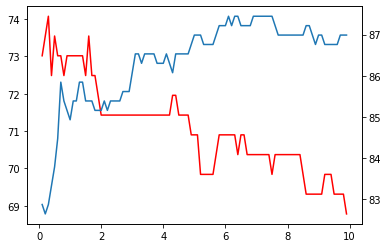

In [0]:
fig ,ax1 = plt.subplots()
ax1.plot(CVal, AccuracyVal, 'red')
ax2 = ax1.twinx()
ax2.plot(CVal,AccuracyTrain)
plt.show()

In [0]:
np.argmax(AccuracyVal)

2

In [0]:
AccuracyVal[2]

74.07407407407408

In [0]:
CVal[2]

0.3

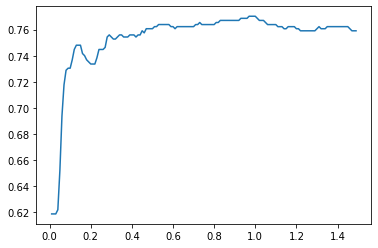

In [0]:
CVal = []
Accuracy = []
for i in range(1,150):
  svc = svm.SVC(kernel='rbf', C= i/100.0)
  C= i/100.0
  scores =  ms.cross_val_score(svc, X_train, y_train, cv=5)
  #print("Accuracy: %0.4f (+/- %0.4f)" % (scores.mean(), scores.std() * 2))
  Accuracy.append(scores.mean())
  CVal.append(C)

fig, ax1 = plt.subplots()
ax1.plot(CVal, Accuracy)

In [0]:
np.argmax(Accuracy)

96

In [0]:
CVal[96]

0.97

In [0]:
Accuracy[96]

0.7702222222222221

In [0]:
best_svm = svm.SVC(C = 0.3, kernel='rbf' )

In [0]:
# SVM 
best_svm.fit(X=X_train, y=y_train)
y_pred_svm = best_svm.predict(X_train)
acc = 100*(1-np.sum(np.abs(y_train - y_pred_svm))/len(y_test))
print("accuracy is {:.4f}%".format(acc))

accuracy is 37.7990%


In [0]:
# SVM 
best_svm.fit(X=X_train, y=y_train)
y_pred_svm = best_svm.predict(X_test)
acc = 100*(1-np.sum(np.abs(y_test - y_pred_svm))/len(y_test))
print("accuracy is {:.4f}%".format(acc))

accuracy is 77.9904%


In [0]:
AccuracyTrain[2]

82.87671232876713

In [0]:
AccuracyVal[2]

74.07407407407408

In [0]:
{‘identity’, ‘logistic’, ‘tanh’, ‘relu’}

In [0]:
mlp = nn.MLPClassifier(hidden_layer_sizes=(100,), 
                       activation='relu',
                       learning_rate='constant',
                       solver='lbfgs',
                       max_iter = 1000)
scores = ms.cross_val_score(mlp, X_train, y_train, cv=5)
print("Accuracy: %0.4f (+/- %0.4f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.6922 (+/- 0.0695)


In [0]:
mlp = nn.MLPClassifier(hidden_layer_sizes=(100,), 
                       activation='tanh',
                       learning_rate='constant',
                       solver='lbfgs',
                       max_iter = 1000)
scores = ms.cross_val_score(mlp, X_train, y_train, cv=5)
print("Accuracy: %0.4f (+/- %0.4f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.7271 (+/- 0.0707)


In [0]:
mlp = nn.MLPClassifier(hidden_layer_sizes=(100,), 
                       activation='identity',
                       learning_rate='adaptive',
                       solver='lbfgs',
                       max_iter = 1500)
scores = ms.cross_val_score(mlp, X_train, y_train, cv=5)
print("Accuracy: %0.4f (+/- %0.4f)" % (scores.mean(), scores.std() * 2))

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REAC

Accuracy: 0.7192 (+/- 0.0450)


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


In [0]:
mlp = nn.MLPClassifier(hidden_layer_sizes=(100,), 
                       activation='logistic',
                       learning_rate='constant',
                       solver='lbfgs',
                       max_iter = 1000)
scores = ms.cross_val_score(mlp, X_train, y_train, cv=5)
print("Accuracy: %0.4f (+/- %0.4f)" % (scores.mean(), scores.std() * 2))

In [0]:
mlp = nn.MLPClassifier(hidden_layer_sizes=(100,), 
                       activation='relu',
                       learning_rate='adaptive',
                       solver='lbfgs',
                       max_iter = 1000)
scores = ms.cross_val_score(mlp, X_train, y_train, cv=5)
print("Accuracy: %0.4f (+/- %0.4f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.6971 (+/- 0.0559)


In [0]:
mlp = nn.MLPClassifier(hidden_layer_sizes=(20,10), 
                       activation='relu',
                       learning_rate='constant',
                       solver='lbfgs',
                       max_iter = 1000)
scores = ms.cross_val_score(mlp, X_train, y_train, cv=5)
print("Accuracy: %0.4f (+/- %0.4f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.6985 (+/- 0.0897)


In [0]:
mlp = nn.MLPClassifier(hidden_layer_sizes=(20,10), 
                       activation='logistic',
                       learning_rate='adaptive',
                       solver='lbfgs',
                       max_iter = 1000)
scores = ms.cross_val_score(mlp, X_train, y_train, cv=5)
print("Accuracy: %0.4f (+/- %0.4f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.7176 (+/- 0.1008)


In [0]:
mlp = nn.MLPClassifier(hidden_layer_sizes=(100), 
                       activation='logistic',
                       learning_rate='constant',
                       solver='lbfgs',
                       max_iter = 1500)
scores = ms.cross_val_score(mlp, X_train, y_train, cv=5)
print("Accuracy: %0.4f (+/- %0.4f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.7048 (+/- 0.0746)


In [0]:
mlp = nn.MLPClassifier(hidden_layer_sizes=(20,10), 
                       activation='tanh',
                       learning_rate='constant',
                       solver='lbfgs',
                       max_iter = 1000)
scores = ms.cross_val_score(mlp, X_train, y_train, cv=5)
print("Accuracy: %0.4f (+/- %0.4f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.6683 (+/- 0.0762)


In [0]:
best_mlp = nn.MLPClassifier(hidden_layer_sizes=(20,10), 
                       activation='relu',
                       learning_rate='constant',
                       solver='lbfgs',
                       max_iter = 1000)

After the test data has been published, load the test dataset. Execute the code below. Test data will be in `X_test`, test targets will be in `y_test`.

In [17]:
best_svm = svm.SVC(C = 1, kernel='rbf', gamma=0.01)
best_svm.fit(X=X_train, y=y_train)
y_pred_svm = best_svm.predict(X_test)
acc = 100*(1-np.sum(np.abs(y_test - y_pred_svm))/len(y_test))
print("accuracy is {:.4f}%".format(acc))

accuracy is 78.9474%


In [0]:
best_mlp = nn.MLPClassifier(hidden_layer_sizes=(100), 
                       activation='logistic',
                       learning_rate='constant',
                       solver='lbfgs',
                       max_iter = 1000)

In [0]:
# MLP 
best_mlp.fit(X=X_train, y=y_train)
y_pred_mlp = best_mlp.predict(X_test)
acc = 100*(1-np.sum(np.abs(y_test - y_pred_mlp))/len(y_test))
print("accuracy is {:.4f}%".format(acc))

accuracy is 69.3780%
